<a href="https://colab.research.google.com/github/felipelabs/data_science/blob/master/Doen%C3%A7as_Cardiovasculares_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Doenças Cardiovasculares Com Machine Learning


Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://www.anoreg.org.br/site/wp-content/uploads/2020/06/doen%C3%A7a-cardiovascular-m%C3%A9dico-cora%C3%A7%C3%A3o-hospital.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.




## Informações sobre os atributos:

**age** - idade em anos

**sex** - sexo do paciente
0: mulher
1: homem

**cp** - tipo da dor torácica
1: angina típica
2: angina atípica
3: dor não cardíaca
4: assintomática

**trestbps** - pressão arterial em repouso

**chol** - colesterol sérico (mg/dl)

**fbs**- açucar no sangue em jejum > 120mg/dl
0: False
1: True

**restecg** - resultado do eletrocardiografia de repouso
0: normal
1: anormalidades de ST-T (inversão da onda T e elevação ou depressão de > 0.05mV)
2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)

**thalach** - frequência cardíaca máxima atingida

**exang** - angina induzida pelo exercício
0: não
1: sim

**oldpeak** - depessão do segmento ST induzida pelo exercício em relação ao repouso

**slope** - inclinação do segmento ST no pico do exercício

**ca** - número de vasos principais colorido por fluoroscopia

**thal** - thallium stress test
3: normal
6: defeito fixo
7: defeito reversível

**num** - diagnóstico de doença cardíaca (diagnóstico angiográfico)
0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o notebook
sns.set_style()

In [ ]:
# Importando os dados

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv")

In [ ]:
# Analisando as primeiras entradas

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# Converter valores maior que 1 na tebal 'num'

df.loc[df.num !=0, "num"] = 1

In [ ]:
# Verificando a váriavel alvo

df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

In [ ]:
# Analisando o tamanho do dataframe

print(f"O dataframe possui {df.shape[0]} linhas.")
print(f"O dataframe possui {df.shape[1]} colunas.")

O dataframe possui 303 linhas.
O dataframe possui 14 colunas.


In [ ]:
# Informações estátisticas

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# tipos das váriaveis 
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
# Verificando se possui valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

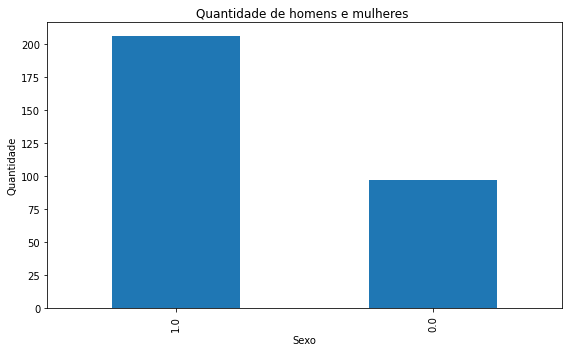

In [ ]:
# Quantidade de homens e mulheres 

fig, ax = plt.subplots(figsize=(8,5))

df.sex.value_counts().plot(kind='bar', ax=ax)
ax.set_title("Quantidade de homens e mulheres ")
ax.set_xlabel("Sexo")
ax.set_ylabel("Quantidade")

plt.tight_layout()


Podemos ver que os homens possue mais homens que mulheres no nosso dataframe.

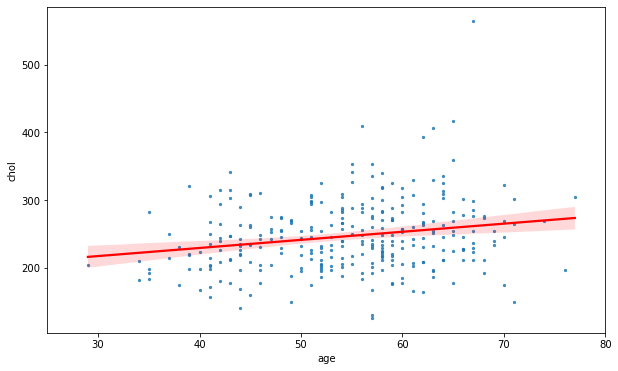

In [ ]:
# Grafico de dispersão para idade e o colesterol
fig, ax = plt.subplots(figsize=(10,6))

ax.set_xlim(left=25, right=80)
sns.regplot(x='age', y='chol', scatter_kws={'s':5}, line_kws={"color":"red"}, data=df, ax=ax);


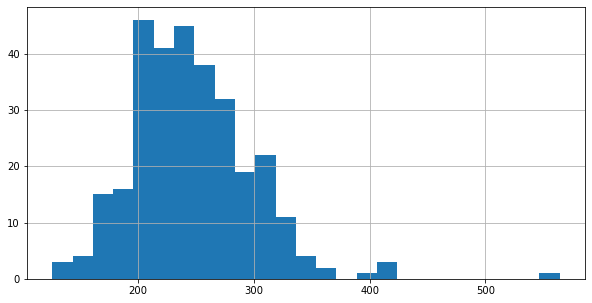

In [ ]:
# Histograma para colesterol sérico

df.chol.hist(bins=25, figsize=(10,5))
sns.set()

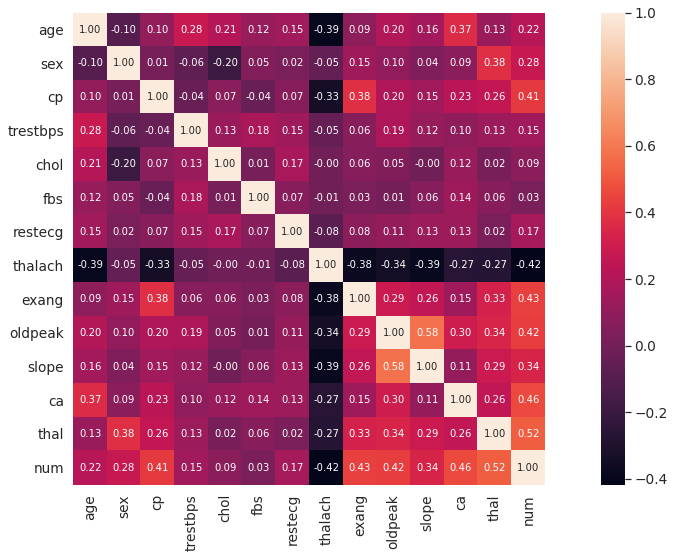

In [ ]:
# Correlação das Variaveis

fig, ax=plt.subplots(figsize=(16,8))

sns.set(font_scale=1.25)
co = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size":10})
plt.tight_layout()

## Aplicando Um Modelo De Machine Learning

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

# Instanciar o modelo
model = LogisticRegression()

# Serapar os dados entre feature matrix e target vector
X= df.drop("num", axis=1)
y= df.num

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Fit do modelo

model.fit(X_train, y_train)

# Fazer a previsão em cima dos dados
X_test = scaler.transform(X_test) # padronizar os dados de testes
y_pred = model.predict(X_test)

In [ ]:
# Analisando o resultado

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Acurrácia: \t{:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("ROC_AUC:\t{:.4f}\n".format(roc_auc_score(y_test, y_pred)))


Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        39
           1       0.84      0.70      0.76        37

    accuracy                           0.79        76
   macro avg       0.80      0.79      0.79        76
weighted avg       0.80      0.79      0.79        76

Acurrácia: 	0.7895

ROC_AUC:	0.7872



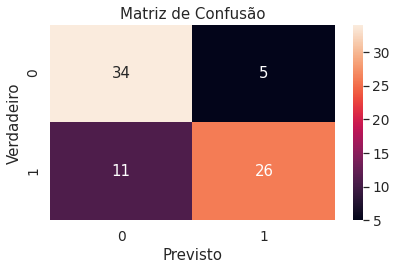

In [ ]:
fig, ax = plt.subplots()

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)
ax.set_title("Matriz de Confusão")
ax.set_xlabel("Previsto")
ax.set_ylabel("Verdadeiro")

plt.tight_layout()